In [ ]:
import numpy as np
import pandas as pd
import nltk


from google.colab import drive
drive.mount('/content/gdrive')

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk import tokenize
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate


from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

nltk.download('punkt')
nltk.download('rslp')
nltk.download('stopwords')
porter_stemmer = PorterStemmer()
stemmer = nltk.stem.RSLPStemmer()
stopwords = set(stopwords.words('portuguese') + list(punctuation))
#stopwords = nltk.corpus.stopwords.words('portuguese')

classifier1 = svm.SVC(kernel="linear", probability=True)
classifier2 = GaussianNB()
classifier3 = RandomForestClassifier()


Mounted at /content/gdrive
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/mestrado_/codigos/FakeBr_mod2.csv')
#df = df.head(100)

def shorten_df(texto):
    for j in range(len(texto)):
        texto[j]=texto[j].split()
        tks=''
        if len(texto[j])>=50:
            for i in range(50):
                tks=tks + ' '+ texto[j][i]
        else:
            for i in range(len(texto[j])):
                tks=tks + ' '+ texto[j][i]
        texto[j]=tks
    return texto

def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

df['Noticia']=shorten_df(df['Noticia'])
df['Noticia']=df['Noticia'].apply(stem_sentences)
CountVec = CountVectorizer(ngram_range=(1,1), stop_words= stopwords)
Count_data = CountVec.fit_transform(df['Noticia'])
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())

X = Count_data.toarray()
y = np.array(df['Classe'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
xb3_0=np.array(list(df['b3_0']))
xpnad_0=np.array(list(df['pnad_0']))
xipca_0=np.array(list(df['ipca_0']))

xb3_30=np.array(list(df['b3_30']))
xpnad_30=np.array(list(df['pnad_30']))
xipca_30=np.array(list(df['ipca_30']))

xb3_60=np.array(list(df['b3_60']))
xpnad_60=np.array(list(df['pnad_60']))
xipca_60=np.array(list(df['ipca_60']))


xb3_90=np.array(list(df['b3_90']))
xpnad_90=np.array(list(df['pnad_90']))
xipca_90=np.array(list(df['ipca_90']))

X0=np.column_stack((X, xb3_0, xpnad_0, xipca_0))
X30=np.column_stack((X, xb3_30, xpnad_30, xipca_30))
X60=np.column_stack((X, xb3_60, xpnad_60, xipca_60))
X90=np.column_stack((X, xb3_90, xpnad_90, xipca_90))

rep1=[[],[],[],[],[]]

In [ ]:
def plotaauc_scores(classifier,X,y):
    import numpy as np
    from sklearn import datasets
    random_state = np.random.RandomState(0)

    #Classification and ROC analysis
    import matplotlib.pyplot as plt

    from sklearn import svm
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import classification_report
    from sklearn.metrics import auc
    from sklearn.metrics import RocCurveDisplay
    from sklearn.model_selection import StratifiedKFold

    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=5)

    tprs = []
    aucs = []
    y_pred = []
    sc = []
    sc1 = []
    repo=[]
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        y_pred.append(classifier.predict(X[test]))
        r1=classification_report(y[test], y_pred[i], output_dict=True)
        r1 = pd.DataFrame(r1).transpose()
        repo.append(r1)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Curva AUC",
    )
    ax.legend(loc="lower right")
    plt.show()
    return repo


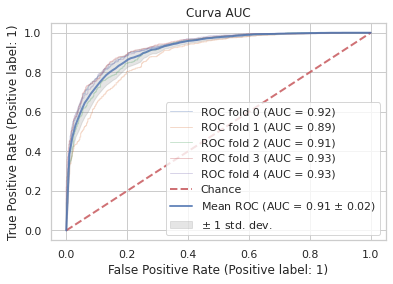

In [ ]:
rep1=[[],[],[],[],[]]
rep1[0]=plotaauc_scores(classifier1,X,y)

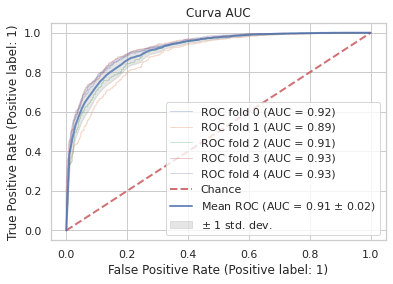

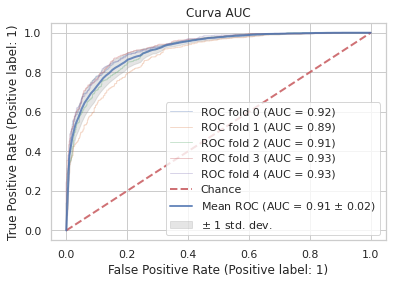

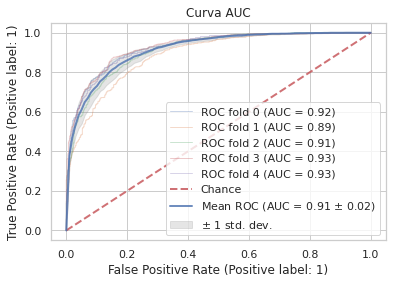

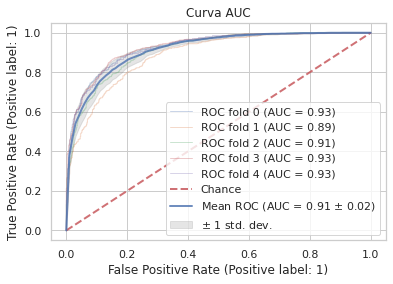

In [ ]:
rep1[1]=plotaauc_scores(classifier1,X0,y)
rep1[2]=plotaauc_scores(classifier1,X30,y)
rep1[3]=plotaauc_scores(classifier1,X60,y)
rep1[4]=plotaauc_scores(classifier1,X90,y)

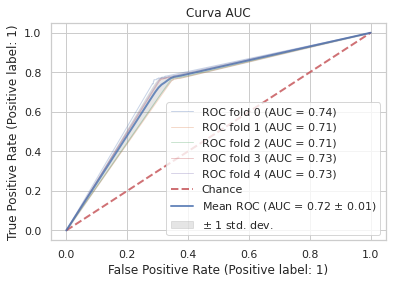

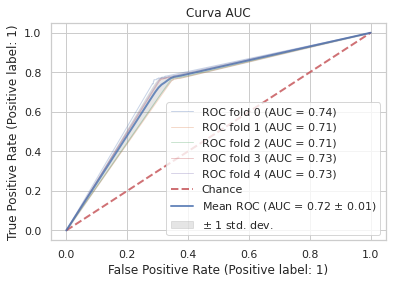

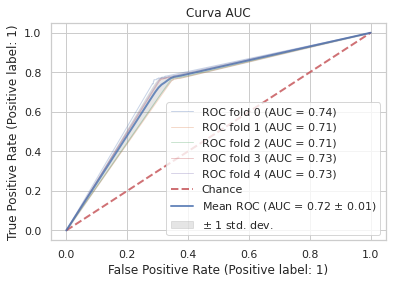

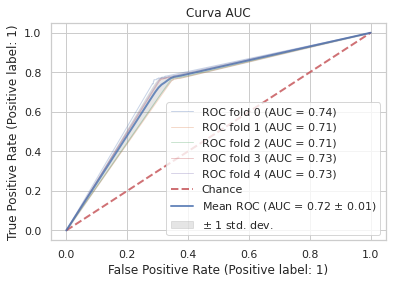

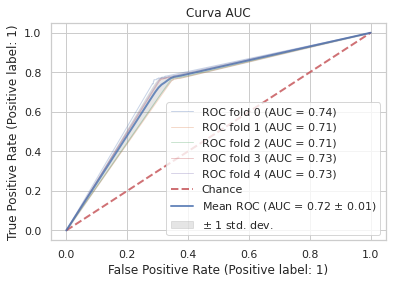

In [ ]:
rep2=[[],[],[],[],[]]
rep2[0]=plotaauc_scores(classifier2,X,y)
rep2[1]=plotaauc_scores(classifier2,X0,y)
rep2[2]=plotaauc_scores(classifier2,X30,y)
rep2[3]=plotaauc_scores(classifier2,X60,y)
rep2[4]=plotaauc_scores(classifier2,X90,y)

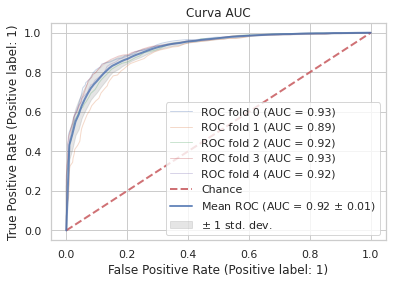

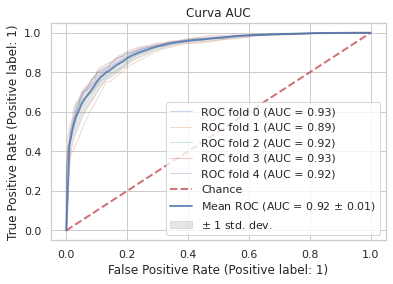

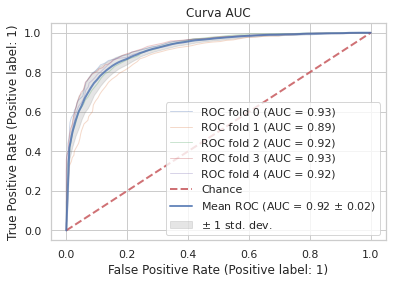

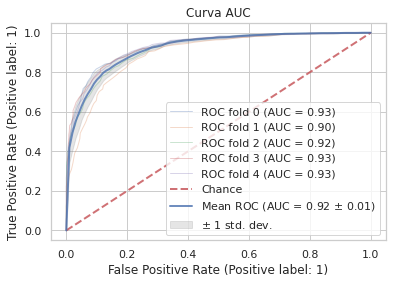

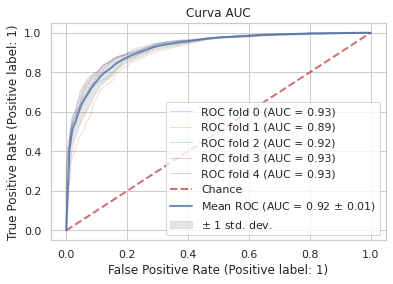

In [ ]:
rep3=[[],[],[],[],[]]
rep3[0]=plotaauc_scores(classifier3,X,y)
rep3[1]=plotaauc_scores(classifier3,X0,y)
rep3[2]=plotaauc_scores(classifier3,X30,y)
rep3[3]=plotaauc_scores(classifier3,X60,y)
rep3[4]=plotaauc_scores(classifier3,X90,y)

In [ ]:
print(rep1)

[[              precision    recall  f1-score      support
0              0.860465  0.822222  0.840909   720.000000
1              0.829787  0.866667  0.847826   720.000000
accuracy       0.844444  0.844444  0.844444     0.844444
macro avg      0.845126  0.844444  0.844368  1440.000000
weighted avg   0.845126  0.844444  0.844368  1440.000000,               precision    recall  f1-score      support
0              0.812130  0.762500  0.786533   720.000000
1              0.776178  0.823611  0.799191   720.000000
accuracy       0.793056  0.793056  0.793056     0.793056
macro avg      0.794154  0.793056  0.792862  1440.000000
weighted avg   0.794154  0.793056  0.792862  1440.000000,               precision    recall  f1-score      support
0              0.813443  0.823611  0.818496   720.000000
1              0.821378  0.811111  0.816212   720.000000
accuracy       0.817361  0.817361  0.817361     0.817361
macro avg      0.817411  0.817361  0.817354  1440.000000
weighted avg   0.817411  0.

In [ ]:
print(rep2)

[[              precision    recall  f1-score      support
0              0.735043  0.716667  0.725738   720.000000
1              0.723577  0.741667  0.732510   720.000000
accuracy       0.729167  0.729167  0.729167     0.729167
macro avg      0.729310  0.729167  0.729124  1440.000000
weighted avg   0.729310  0.729167  0.729124  1440.000000,               precision    recall  f1-score      support
0              0.730109  0.650000  0.687730   720.000000
1              0.684606  0.759722  0.720211   720.000000
accuracy       0.704861  0.704861  0.704861     0.704861
macro avg      0.707357  0.704861  0.703970  1440.000000
weighted avg   0.707357  0.704861  0.703970  1440.000000,               precision    recall  f1-score      support
0              0.738245  0.654167  0.693667   720.000000
1              0.689526  0.768056  0.726675   720.000000
accuracy       0.711111  0.711111  0.711111     0.711111
macro avg      0.713885  0.711111  0.710171  1440.000000
weighted avg   0.713885  0.

In [ ]:
print(rep3)

[[              precision    recall  f1-score      support
0              0.850949  0.872222  0.861454   720.000000
1              0.868946  0.847222  0.857947   720.000000
accuracy       0.859722  0.859722  0.859722     0.859722
macro avg      0.859947  0.859722  0.859700  1440.000000
weighted avg   0.859947  0.859722  0.859700  1440.000000,               precision    recall  f1-score      support
0              0.835294  0.788889  0.811429   720.000000
1              0.800000  0.844444  0.821622   720.000000
accuracy       0.816667  0.816667  0.816667     0.816667
macro avg      0.817647  0.816667  0.816525  1440.000000
weighted avg   0.817647  0.816667  0.816525  1440.000000,               precision    recall  f1-score      support
0              0.810458  0.861111  0.835017   720.000000
1              0.851852  0.798611  0.824373   720.000000
accuracy       0.829861  0.829861  0.829861     0.829861
macro avg      0.831155  0.829861  0.829695  1440.000000
weighted avg   0.831155  0.